In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus
import numpy as np
from sklearn.preprocessing import TargetEncoder

This dataset is a synthetic version inspired by the original Credit Risk dataset on Kaggle and enriched with additional variables based on Financial Risk for Loan Approval data. SMOTENC was used to simulate new data points to enlarge the instances. The dataset is structured for both categorical and continuous features.



The dataset contains 45,000 records and 14 variables, each described below:

Column:


1. person_age - Age of the person
2. person_gender	 - Gender of the person
3. person_education	 - Highest education level
4. person_income	- Annual income
5. person_emp_exp - 	Years of employment experience
6. person_home_ownership -	Home ownership status (e.g., rent, own, mortgage)
7. loan_amnt	- Loan amount requested
8. oan_intent -	Purpose of the loan
9. loan_int_rate -	Loan interest rate
10. loan_percent_income -	Loan amount as a percentage of annual income
11. cb_person_cred_hist_length -	Length of credit history in years
12. credit_score -	Credit score of the person
13. previous_loan_defaults_on_file -	Indicator of previous loan defaults
14. loan_status (target variable) -	Loan approval status: 1 = approved; 0 = rejected

Скачаем датасет и загрузим его в фрейм данных

In [ ]:
data = pd.read_csv("/content/loan_data.csv")
data.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


Смотрим статистическую информацию о данных

In [ ]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Смотрим, есть ли пропуски в данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Пропусков нет

Смотрим названия столбцов

In [ ]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

Смотрим колиство строк и столбцов

In [ ]:
data.shape

(45000, 14)

In [ ]:
data.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


Визуализируем данные


Визуализируем сначала только количественные признаки

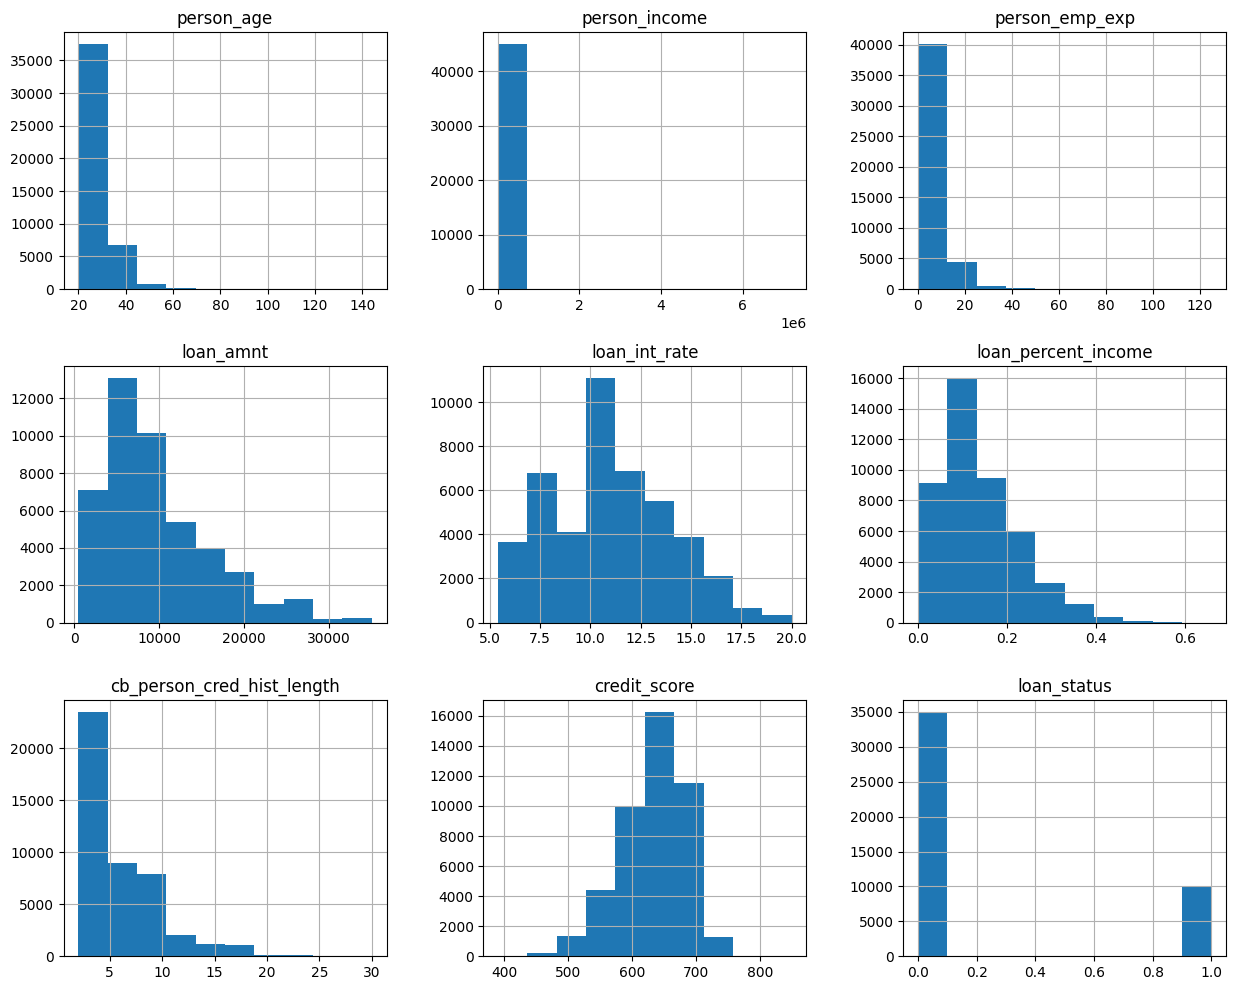

In [ ]:
data.hist(figsize=(15,12));

Визуализируем категориальные признаки

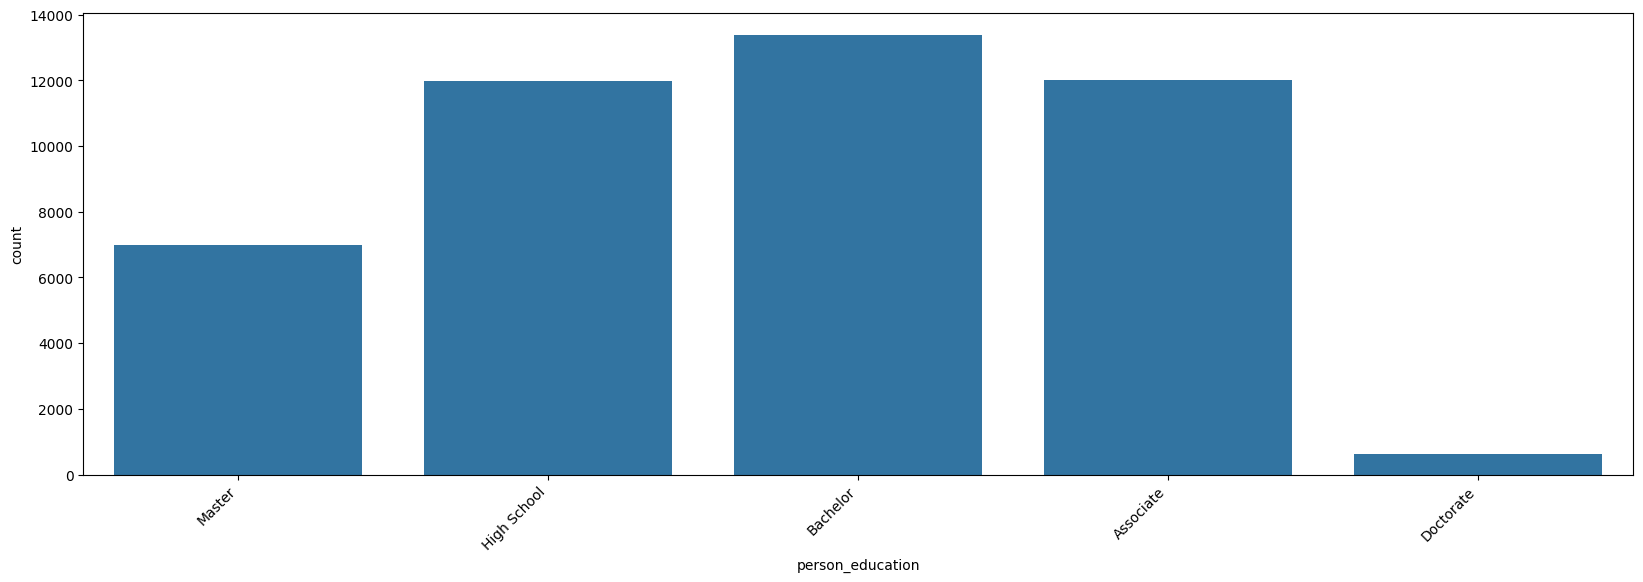

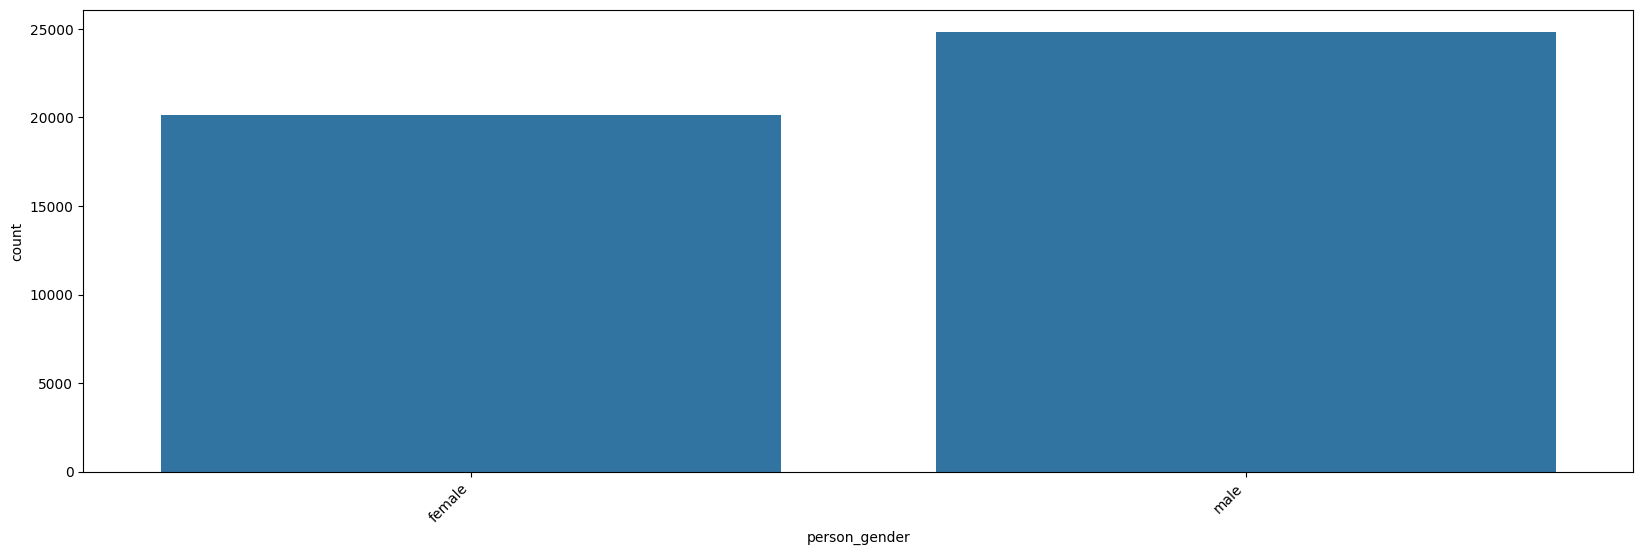

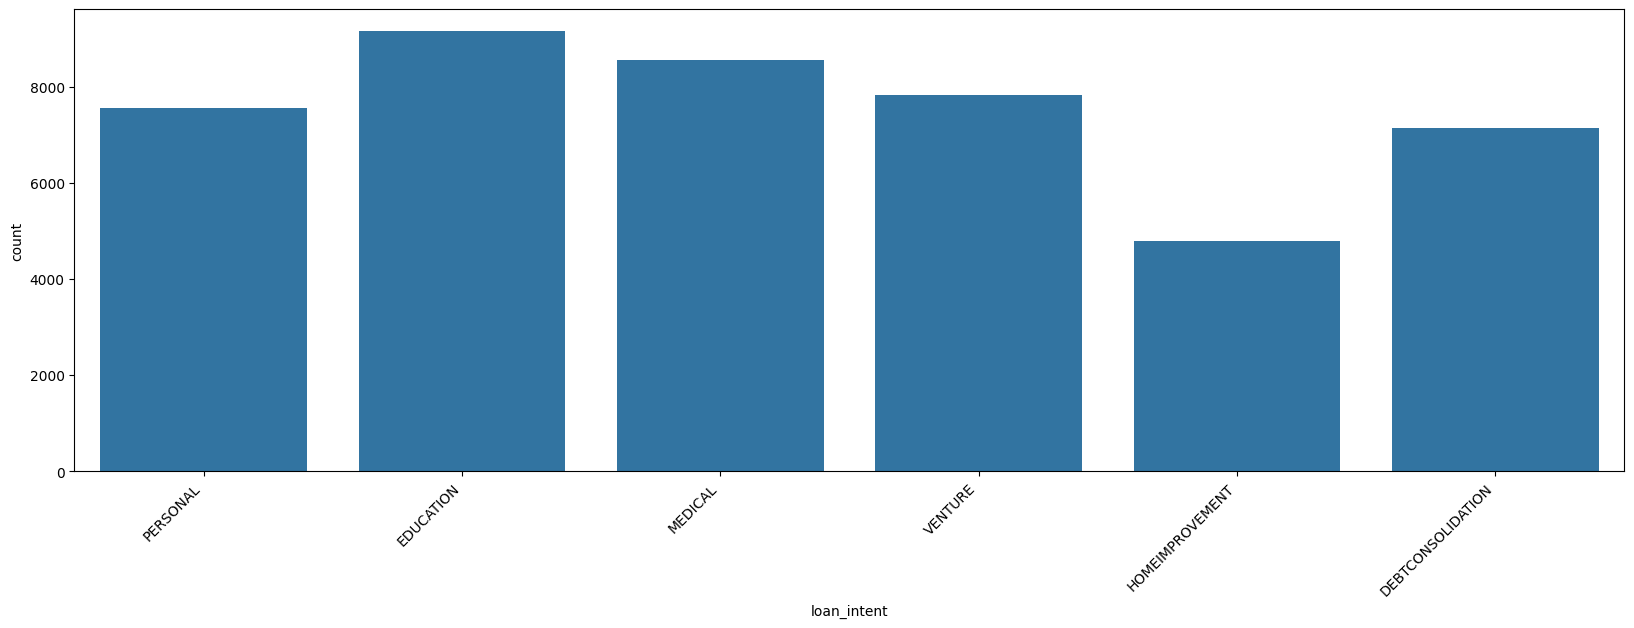

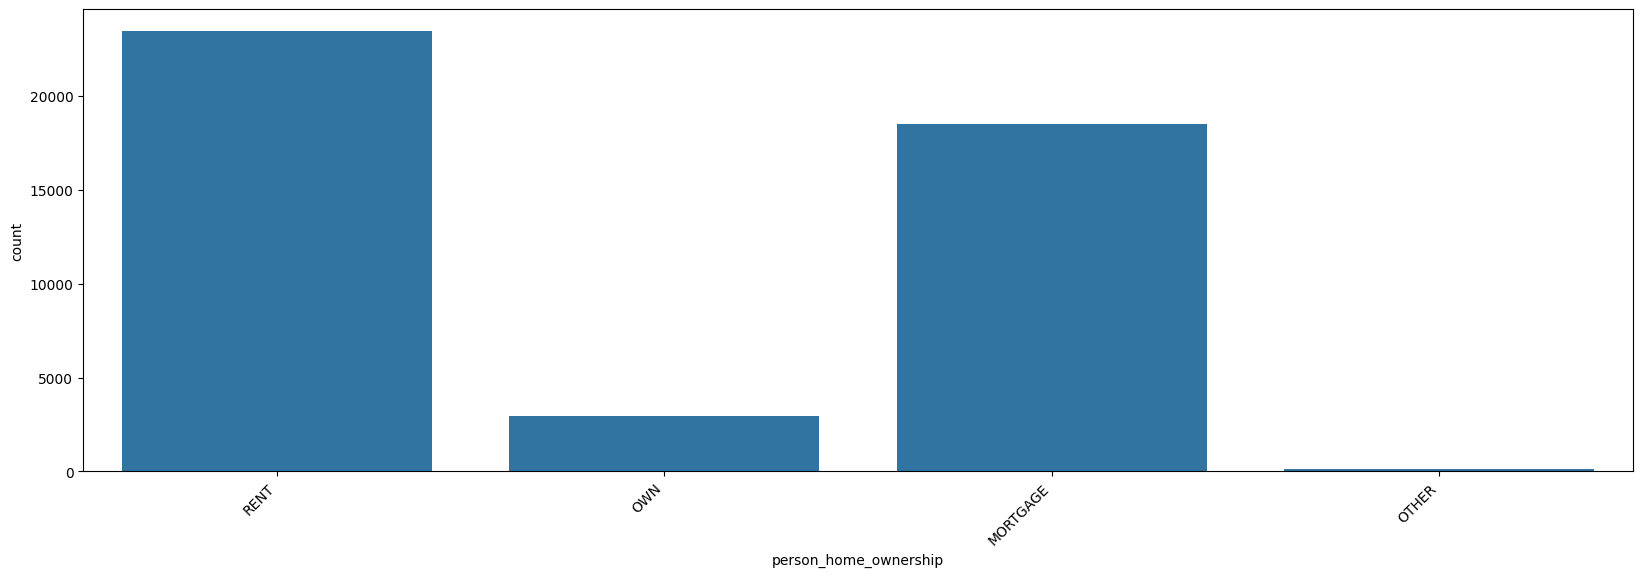

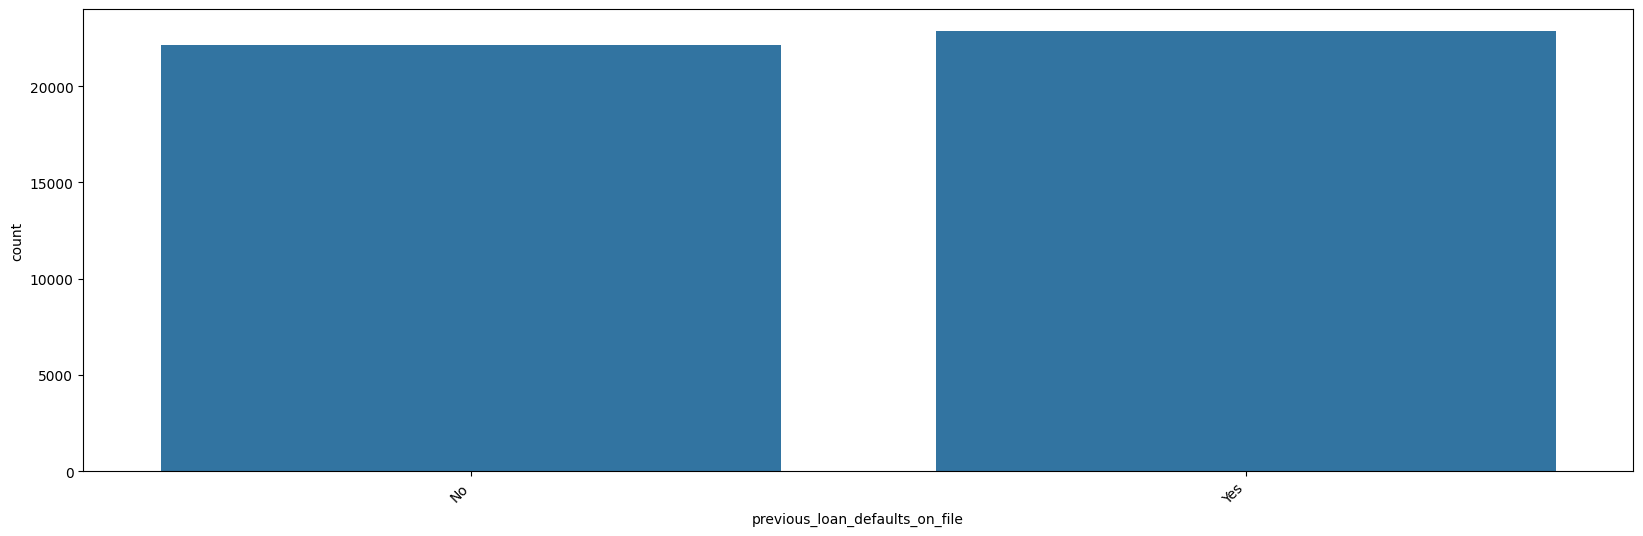

In [ ]:
features2 = list(set(data.columns) - set(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']))

for feature in features2:
    plt.figure(figsize=(20, 6))
    sns.countplot(x=data[feature])
    plt.xticks(rotation=45, ha='right')


Посмотрим, на какие цели людям в большей степени одобряют кредиты, и на какие цели отклоняют

<Axes: xlabel='loan_status', ylabel='count'>

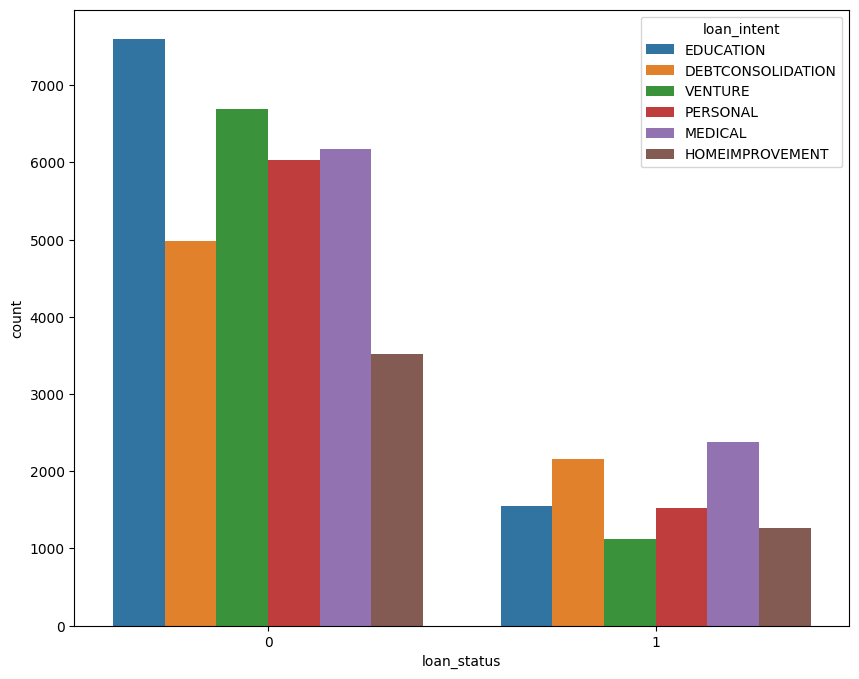

In [ ]:
sns.countplot(data=data, x="loan_status", hue='loan_intent')

Посмотрим, какое образование имеют люди, которым одобрен кредит, и которым отказали

<Axes: xlabel='loan_status', ylabel='Count'>

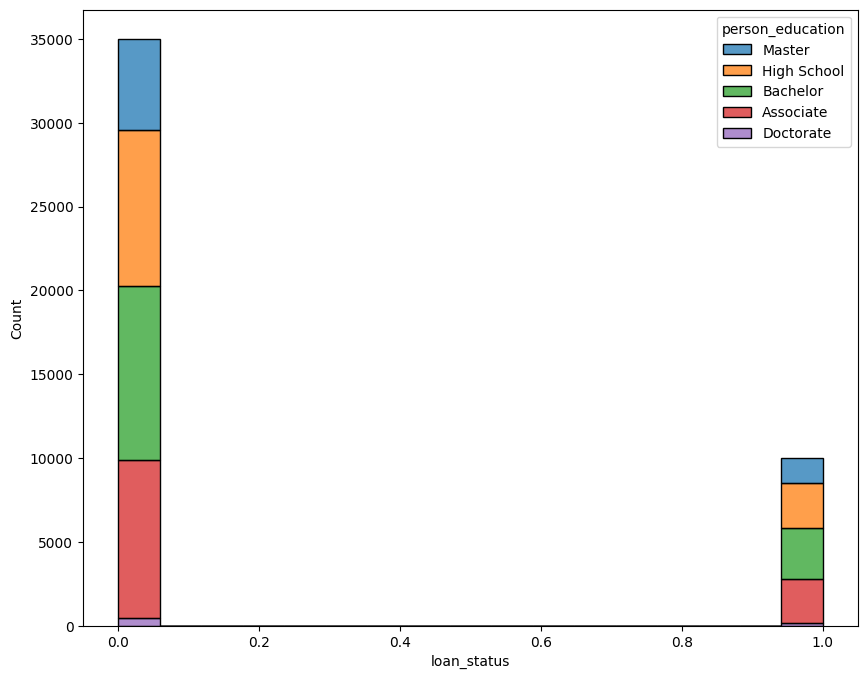

In [ ]:
sns.histplot(data, x="loan_status", hue="person_education", multiple="stack")

Посмотрим ящик с усами(возраст, одобрение кредита), чтобы определить количество выбросов

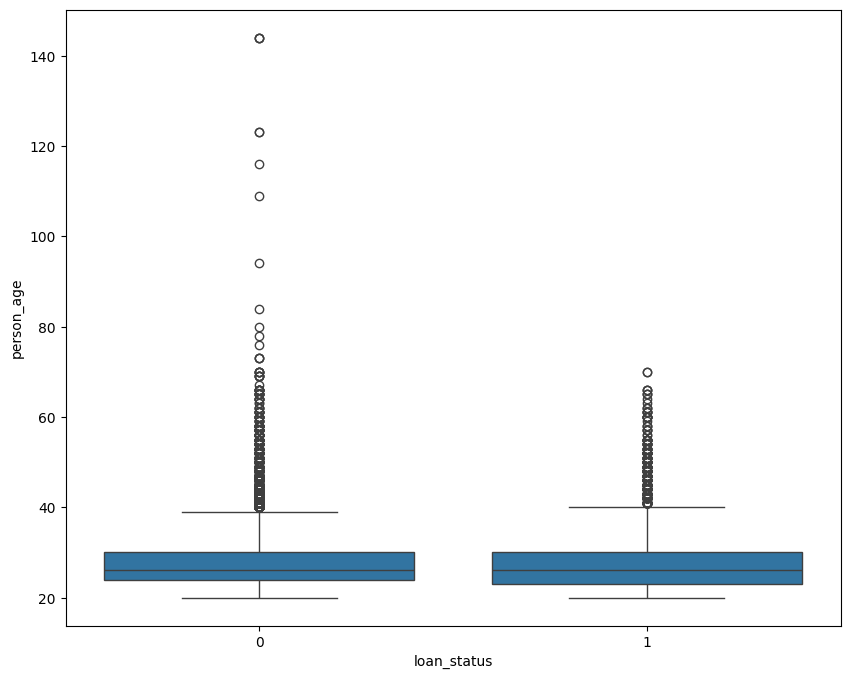

In [ ]:
sns.boxplot(data=data, y='person_age', x='loan_status');

Почти то же, что и ящик с усами - виолин плот

<Axes: xlabel='loan_status', ylabel='person_age'>

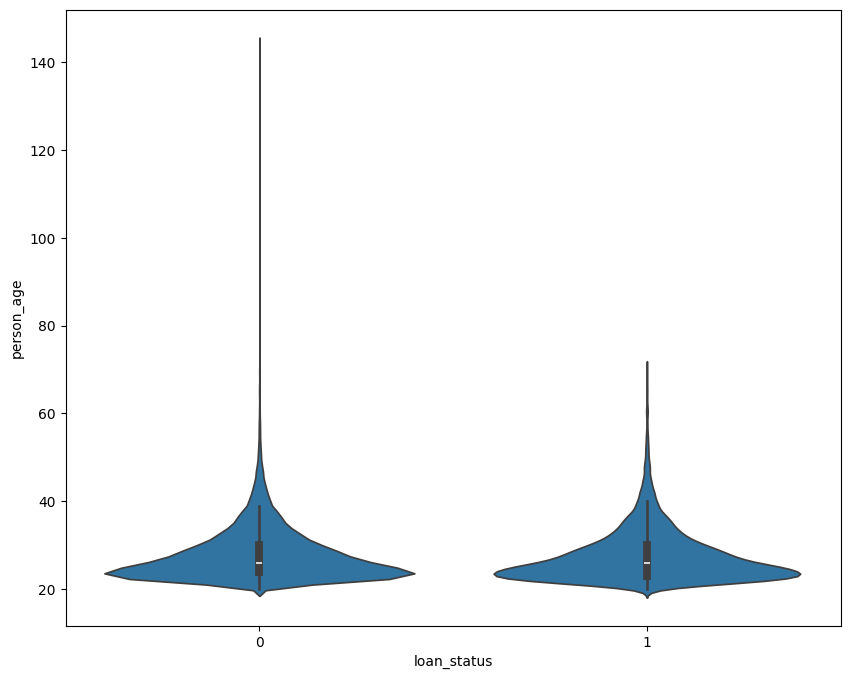

In [ ]:
sns.violinplot(x='loan_status', y='person_age', data=data)

Посмотрим на распределение образования и возраста, для этого построим лайнплот

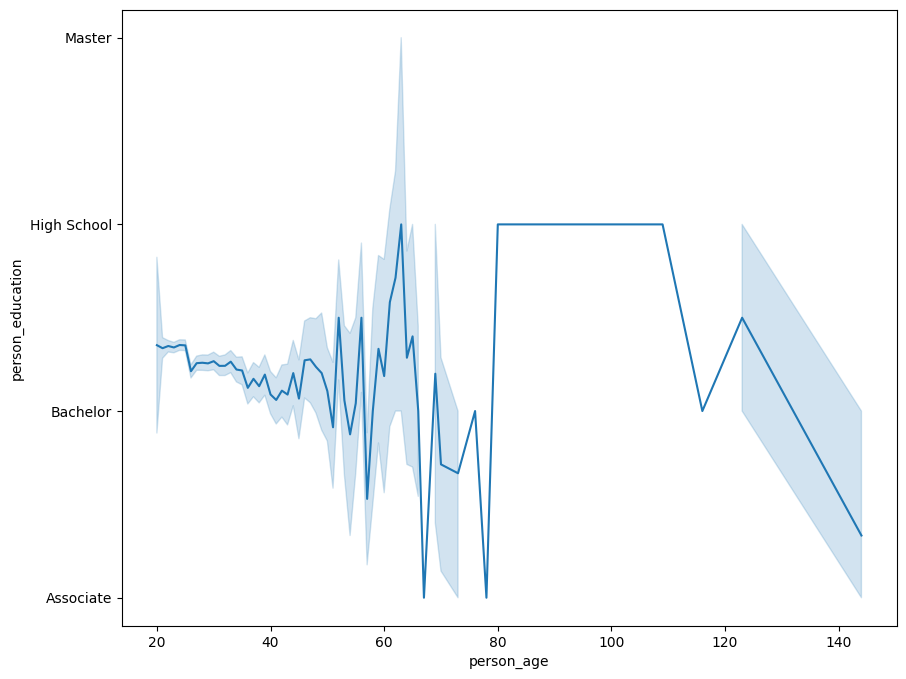

In [ ]:
sns.lineplot(data=data, x='person_age', y='person_education');

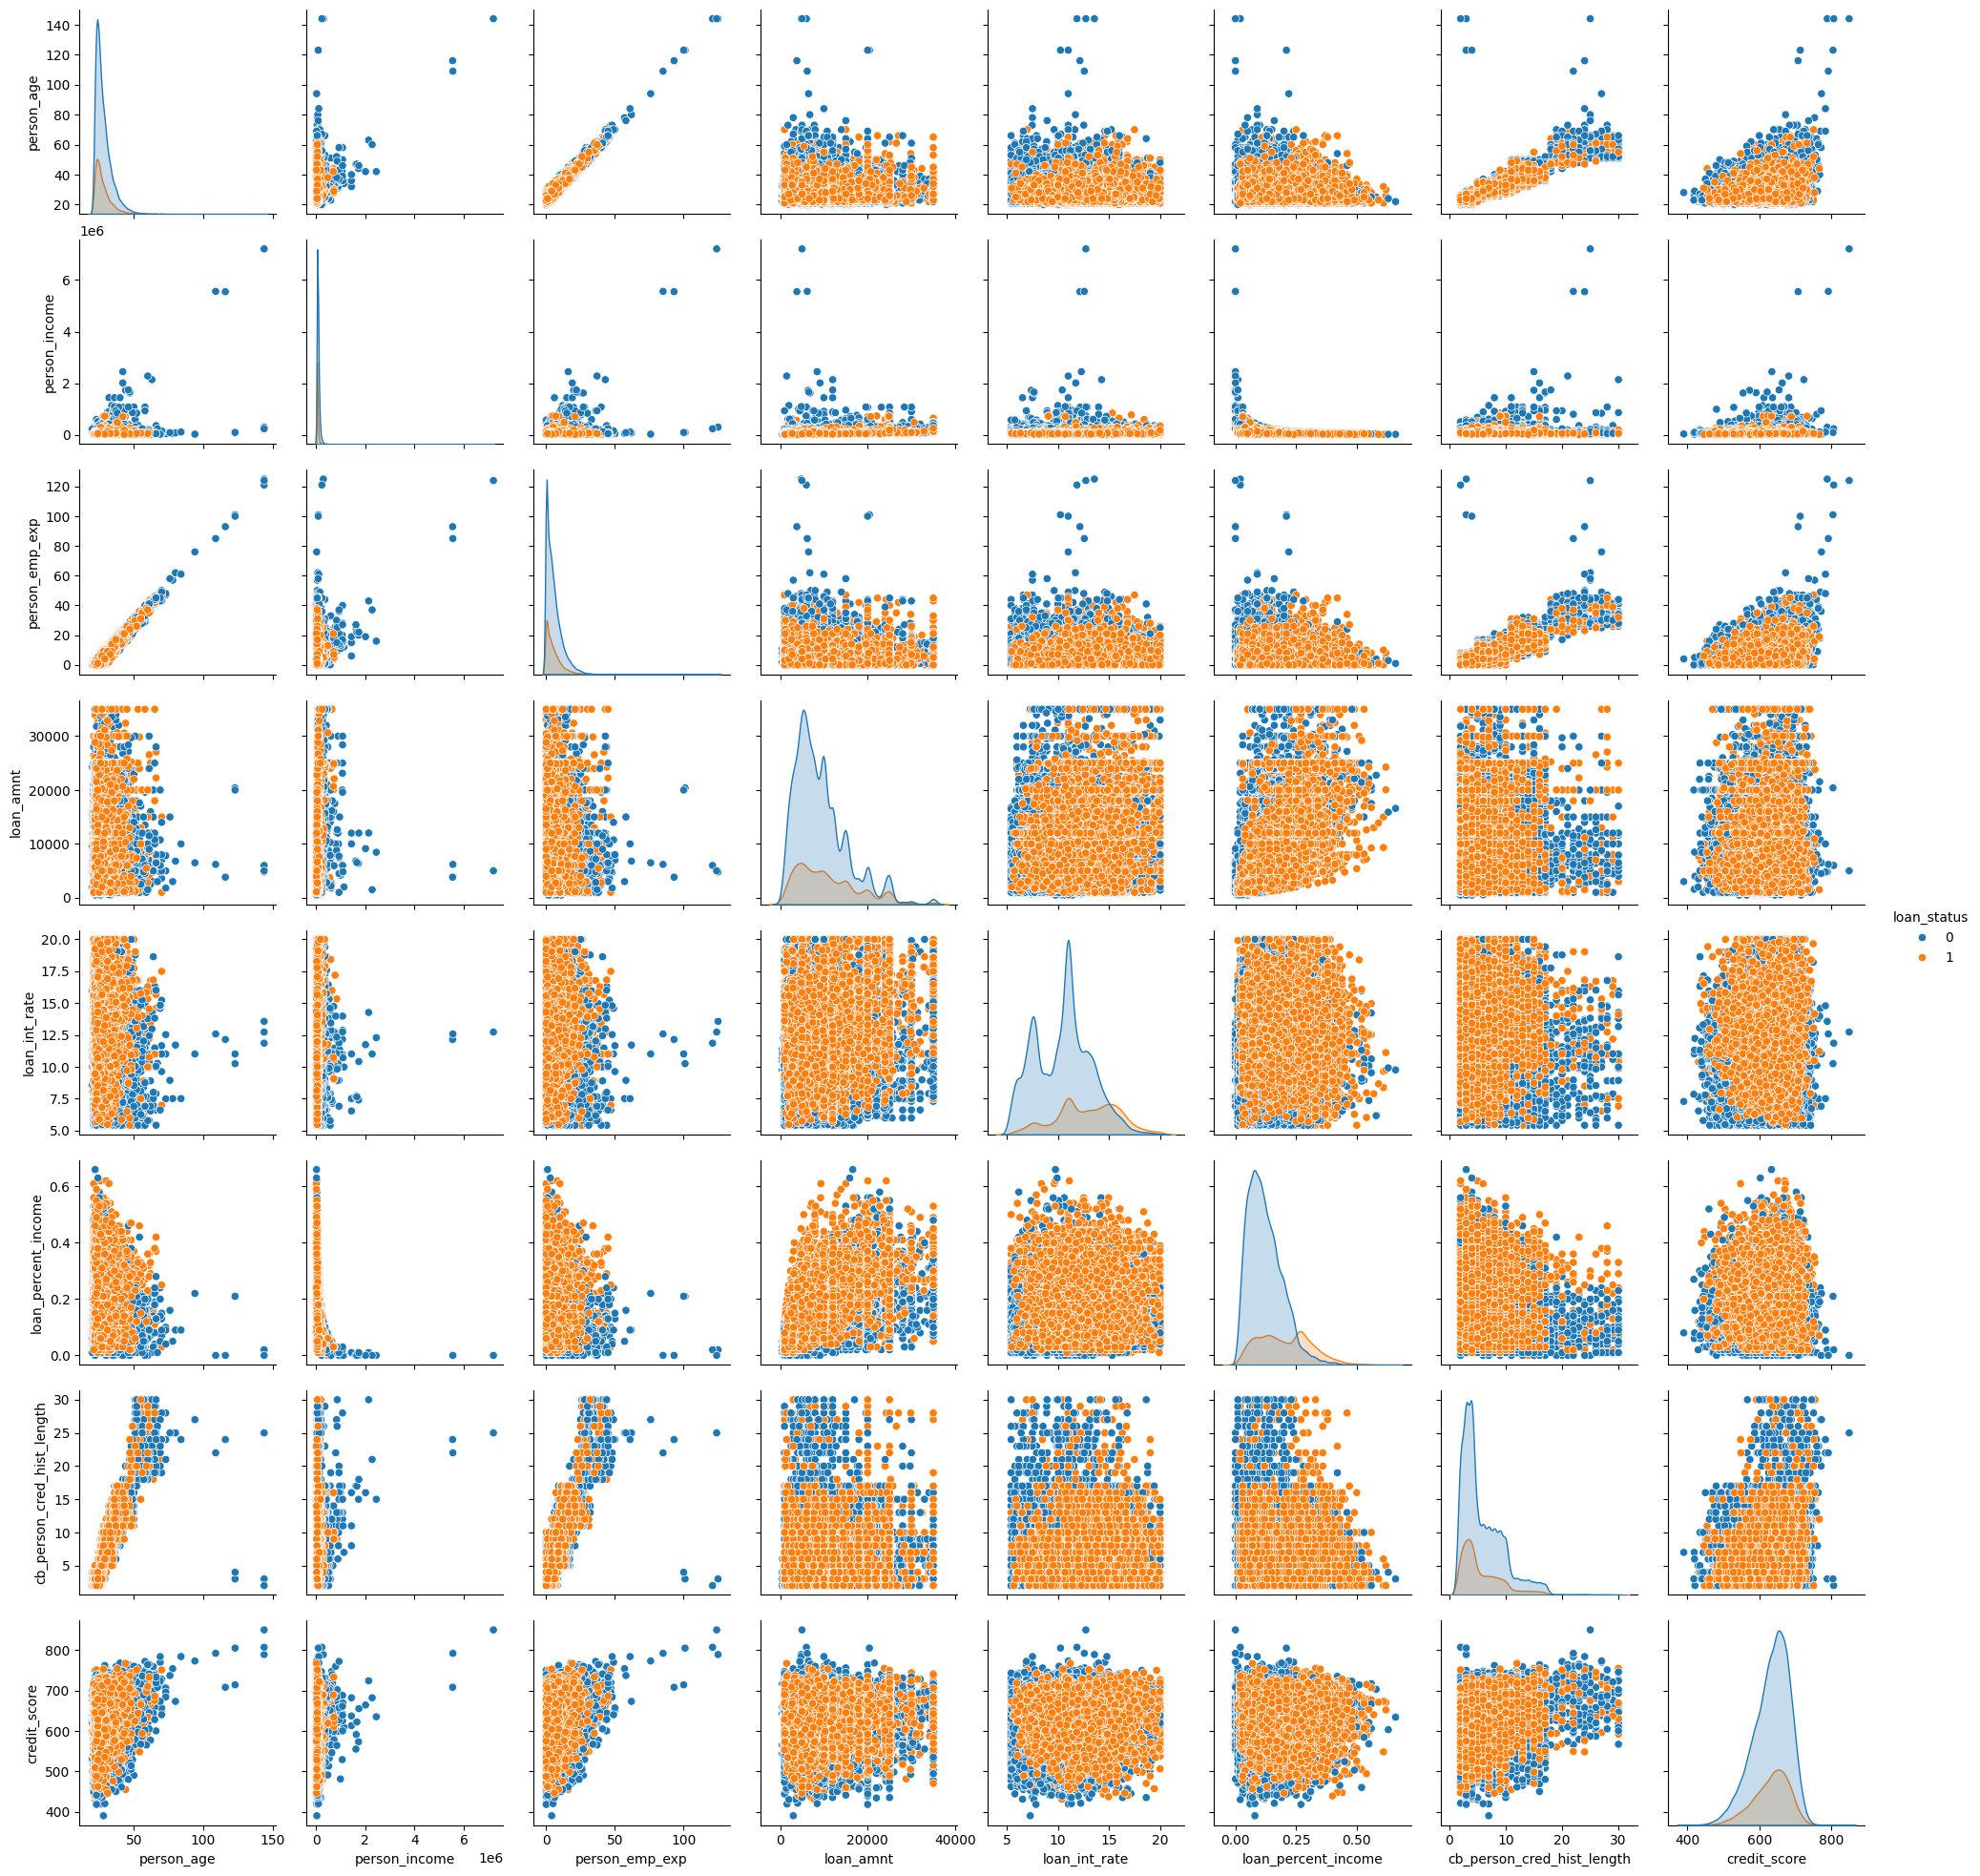

In [ ]:
sns.pairplot(data, kind="scatter", hue="loan_status");

Построим тепловую карту только для количественных данных

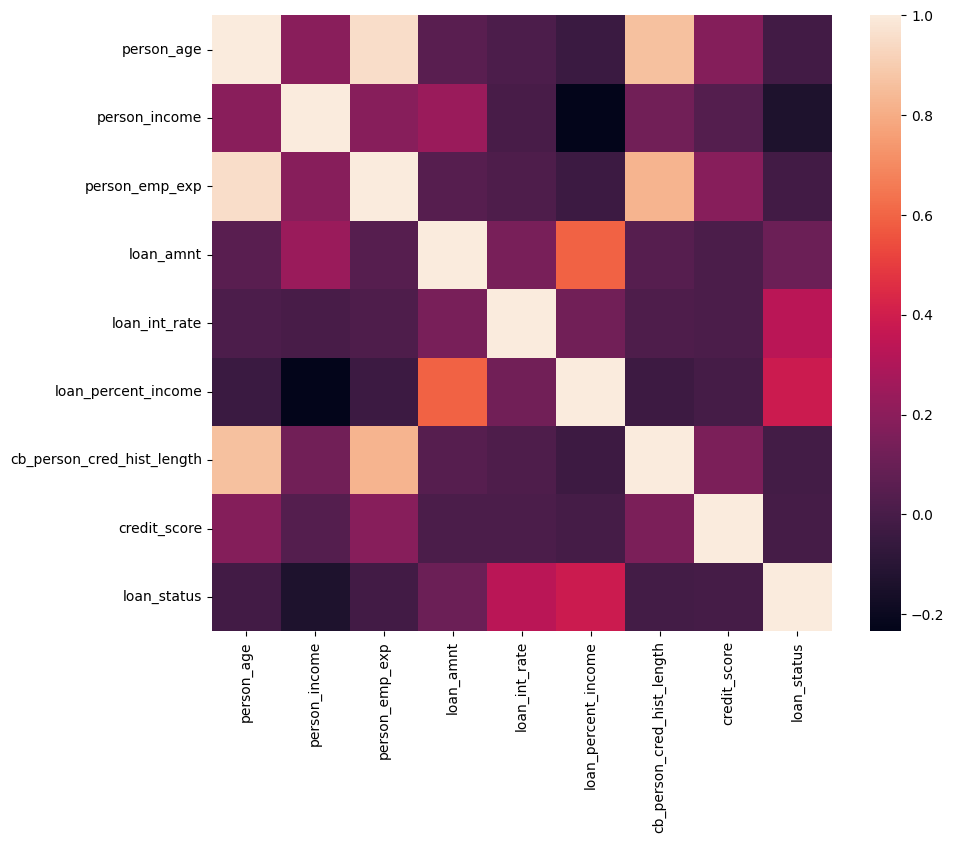

In [ ]:
sns.heatmap(data.corr(numeric_only = True));

Закодируем данные. Сначала поделим данные на категориальные и количественные

In [ ]:
categorical_columns = [
    c for c in data.columns if data[c].dtype.name == "object"
]
numerical_columns = [
    c for c in data.columns if data[c].dtype.name != "object"
]

print("categorical_columns:", categorical_columns)
print("numerical_columns:", numerical_columns)

categorical_columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
numerical_columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


Для кодирования применим get_dummies

In [ ]:
df = pd.concat(
    [data[numerical_columns], pd.get_dummies(data[categorical_columns])],
    axis=1,
)

In [ ]:
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_female,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,True,...,False,True,False,False,False,False,True,False,True,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,True,...,True,False,False,True,False,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,True,...,False,False,False,False,False,True,False,False,True,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,True,...,False,True,False,False,False,True,False,False,True,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,False,...,False,True,False,False,False,True,False,False,True,False
